In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
x=data.data
y=data.target

In [4]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2              # Chi Square
from sklearn.feature_selection import f_classif         # Anova F-Test

###  Chi Square

In [5]:
chi2_selector=SelectKBest(chi2,k=2)
kbest=chi2_selector.fit_transform(x,y)

In [6]:
print("Shape of orginal features :",x.shape)  
print("Shape of reduced features :",kbest.shape)

Shape of orginal features : (150, 4)
Shape of reduced features : (150, 2)


In [7]:
chi2_scores=pd.DataFrame(list(zip(data.feature_names,chi2_selector.scores_)),columns=["Feature_Name","Score"])
chi2_scores  # SCores of all the Features

,Feature_Name,Score
0,sepal length (cm),10.817821
1,sepal width (cm),3.710728
2,petal length (cm),116.312613
3,petal width (cm),67.048360


In [8]:
np.asarray(data.feature_names)[chi2_selector.get_support()]  # After filtering,the name of the features.

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

### 

### Simplify Chi Square & F-test 

In [9]:
chi2(x,y) # It show the values of chi_square.. 

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [10]:
chi_scores=chi2(x,y) # Store the values in a variable.

In [11]:
chi_value=ft_scores=pd.DataFrame(list(zip(data.feature_names,chi_scores[0])),columns=["Feature_Name","Score"])
ft_scores  # SCores of all the Features

,Feature_Name,Score
0,sepal length (cm),10.817821
1,sepal width (cm),3.710728
2,petal length (cm),116.312613
3,petal width (cm),67.048360


<AxesSubplot:>

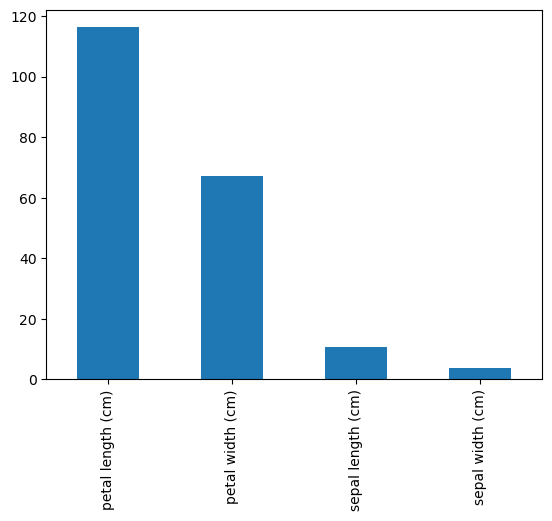

In [12]:
chi_values=pd.Series(chi_scores[0],index=data.feature_names)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

### F-Test 

In [13]:
ft_selector=SelectPercentile(f_classif,percentile=10)
per=ft_selector.fit_transform(x,y)

In [14]:
print("Shape of orginal features :",x.shape)  
print("Shape of reduced features :",per.shape)

Shape of orginal features : (150, 4)
Shape of reduced features : (150, 1)


In [15]:
ft_scores=pd.DataFrame(list(zip(data.feature_names,ft_selector.scores_)),columns=["Feature_Name","Score"])
ft_scores  # SCores of all the Features

,Feature_Name,Score
0,sepal length (cm),119.264502
1,sepal width (cm),49.160040
2,petal length (cm),1180.161182
3,petal width (cm),960.007147


In [16]:
np.asarray(data.feature_names)[ft_selector.get_support()]

array(['petal length (cm)'], dtype='<U17')